# **Welcome to HELL Project - Defining Spotify Dataset**

A project carried by Nicolò Paolo Ferrari. Emotional helpers are Joan, Martiña and Elena and Alberto. Technical Guru will be Thom



In [1]:
!pip install spotipy

     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 153kB 39.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
# import the rapper to use and a function to authenticate into our dashboard!
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from time import sleep

In [3]:
# it is a secret text file!! you have to upload it to file in google colab
# you need to do it all in once!
# NEVER SHOW YOUR SECRETS
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
  secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [4]:
# Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [5]:
# LET'S FIRST DEAL WITH THE ROCK PLAYLIST

# Function to give you all songs in a playlist
#'1 user' (can be default, like this case 'spotify') and 'link of playlist'
playlist = sp.user_playlist_tracks("spotify", "5bZOu1Yz2Xsd3ZB2HFumrv")


In [6]:
# Let's look at items and keys:
playlist["items"][0]

{'added_at': '2020-12-26T23:00:04Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/12137951493'},
  'href': 'https://api.spotify.com/v1/users/12137951493',
  'id': '12137951493',
  'type': 'user',
  'uri': 'spotify:user:12137951493'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dXaa6jwM7B52GZpaJEIr5'},
     'href': 'https://api.spotify.com/v1/artists/3dXaa6jwM7B52GZpaJEIr5',
     'id': '3dXaa6jwM7B52GZpaJEIr5',
     'name': 'Puddle Of Mudd',
     'type': 'artist',
     'uri': 'spotify:artist:3dXaa6jwM7B52GZpaJEIr5'}],
   'available_markets': [],
   'external_urls': {'spotify': 'https://open.spotify.com/album/62PfPXEnFKH8wftTmQjZj0'},
   'href': 'https://api.spotify.com/v1/albums/62PfPXEnFKH8wftTmQjZj0',
   'id': '62PfPXEnFKH8wftTmQjZj0',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273a465a5993a2e69b6fb

In [7]:
playlist["items"][0]["track"]["album"]["artists"][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3dXaa6jwM7B52GZpaJEIr5'},
 'href': 'https://api.spotify.com/v1/artists/3dXaa6jwM7B52GZpaJEIr5',
 'id': '3dXaa6jwM7B52GZpaJEIr5',
 'name': 'Puddle Of Mudd',
 'type': 'artist',
 'uri': 'spotify:artist:3dXaa6jwM7B52GZpaJEIr5'}

In [8]:
from random import randint

In [9]:
# Let's take respectful sleeps!

wait_time = randint(1,2)

In [10]:
# defining empty lists for the rock playlists!
playlist_tracks =[]
playlist_artist = []
playlist_audio_features = []

In [11]:
# For loop to get everything for the rock playlist!
while playlist['next']!=None:
  playlist = sp.next(playlist)
  for i in range(len(playlist["items"])):
    tracks = playlist["items"][i]["track"]["name"]
    playlist_tracks.append(tracks)
  for i in range(len(playlist["items"])):    
    artist = playlist["items"][i]["track"]['album']["artists"][0]["name"]
    playlist_artist.append(artist)
  list_audio_uri = []
  for i in range(len(playlist["items"])):
    song_uri = playlist["items"][i]["track"]["uri"]
    list_audio_uri.append(song_uri)
  playlist_audio_features.append(list_audio_uri)
  sleep(2)

In [12]:
# audio features for the rock playlist needs extra care to take the information

In [13]:
playlist_tracks_rock = pd.DataFrame(playlist_tracks)
playlist_tracks_rock

,0
0,Come As You Are
1,Fortunate Son
2,Patience
3,Lithium
4,Every Breath You Take - Remastered 2003
...,...
1877,Boys Don't Cry
1878,Let's Go To Bed
1879,The Lovecats
1880,Close To Me


In [14]:
playlist_artist_rock = pd.DataFrame(playlist_artist)
playlist_artist_rock

,0
0,Nirvana
1,Creedence Clearwater Revival
2,Guns N' Roses
3,Nirvana
4,The Police
...,...
1877,The Cure
1878,The Cure
1879,The Cure
1880,The Cure


In [15]:
len(sp.audio_features(playlist_audio_features[0]))

100

In [16]:
# extracting audio features from nested list for rock
audio_features_1stage = []

for sublist in playlist_audio_features:
  audio_features_1stage.append(sp.audio_features(sublist))
  sleep(2)

In [17]:
# and now I am using a flatten function to put all the info merged above in for loop at the same list level
def flatten(input_list):
  return [item for sublist in input_list for item in sublist]

In [18]:
# apply the flatten function to rock playlist
rock_audio_features = flatten(audio_features_1stage)
rock_audio_features

[{'acousticness': 0.00016,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0MKGH8UMfCnq5w7nG06oM5',
  'danceability': 0.5,
  'duration_ms': 218920,
  'energy': 0.824,
  'id': '0MKGH8UMfCnq5w7nG06oM5',
  'instrumentalness': 0.00161,
  'key': 4,
  'liveness': 0.0916,
  'loudness': -5.846,
  'mode': 0,
  'speechiness': 0.0388,
  'tempo': 120.125,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/0MKGH8UMfCnq5w7nG06oM5',
  'type': 'audio_features',
  'uri': 'spotify:track:0MKGH8UMfCnq5w7nG06oM5',
  'valence': 0.539},
 {'acousticness': 0.208,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3yI282DoIJyERd0vGukMoB',
  'danceability': 0.643,
  'duration_ms': 140773,
  'energy': 0.669,
  'id': '3yI282DoIJyERd0vGukMoB',
  'instrumentalness': 0.00664,
  'key': 0,
  'liveness': 0.151,
  'loudness': -7.485,
  'mode': 1,
  'speechiness': 0.0398,
  'tempo': 132.709,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/3yI282DoIJyE

In [19]:
# Now I am creating different datasets in order to have track names, artists and features in Rock playlist
playlist_audio_features_rock = pd.DataFrame(rock_audio_features)
playlist_audio_features_rock

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.001610,0.0916,0.539,120.125,audio_features,0MKGH8UMfCnq5w7nG06oM5,spotify:track:0MKGH8UMfCnq5w7nG06oM5,https://api.spotify.com/v1/tracks/0MKGH8UMfCnq...,https://api.spotify.com/v1/audio-analysis/0MKG...,218920,4
1,0.643,0.669,0,-7.485,1,0.0398,0.20800,0.006640,0.1510,0.609,132.709,audio_features,3yI282DoIJyERd0vGukMoB,spotify:track:3yI282DoIJyERd0vGukMoB,https://api.spotify.com/v1/tracks/3yI282DoIJyE...,https://api.spotify.com/v1/audio-analysis/3yI2...,140773,4
2,0.458,0.265,6,-14.452,1,0.0313,0.72300,0.000254,0.1920,0.352,120.411,audio_features,2uKcU4FPX5eOjmd6RWb9OF,spotify:track:2uKcU4FPX5eOjmd6RWb9OF,https://api.spotify.com/v1/tracks/2uKcU4FPX5eO...,https://api.spotify.com/v1/audio-analysis/2uKc...,354400,4
3,0.678,0.656,7,-6.410,1,0.0381,0.00174,0.000000,0.0631,0.485,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4
4,0.813,0.460,1,-9.780,1,0.0346,0.56000,0.010500,0.0724,0.729,117.387,audio_features,2sXp9Qmvc7mRaDBjBgcGGi,spotify:track:2sXp9Qmvc7mRaDBjBgcGGi,https://api.spotify.com/v1/tracks/2sXp9Qmvc7mR...,https://api.spotify.com/v1/audio-analysis/2sXp...,253887,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,0.463,0.597,11,-13.515,0,0.0637,0.01780,0.000000,0.1770,0.735,169.670,audio_features,1YQCRXscu8xE74BVVMUCRr,spotify:track:1YQCRXscu8xE74BVVMUCRr,https://api.spotify.com/v1/tracks/1YQCRXscu8xE...,https://api.spotify.com/v1/audio-analysis/1YQC...,154667,4
1878,0.800,0.747,0,-11.694,0,0.0777,0.37500,0.050600,0.3030,0.676,128.096,audio_features,36MoryB9ZwIkF2rtVX1OsT,spotify:track:36MoryB9ZwIkF2rtVX1OsT,https://api.spotify.com/v1/tracks/36MoryB9ZwIk...,https://api.spotify.com/v1/audio-analysis/36Mo...,213800,4
1879,0.741,0.528,0,-12.919,1,0.0666,0.49700,0.000000,0.4710,0.964,91.824,audio_features,1573W35tQ890rcyKRy7utK,spotify:track:1573W35tQ890rcyKRy7utK,https://api.spotify.com/v1/tracks/1573W35tQ890...,https://api.spotify.com/v1/audio-analysis/1573...,219507,4
1880,0.666,0.447,11,-14.253,1,0.1520,0.29100,0.161000,0.3440,0.941,184.935,audio_features,0L31hObKkJgFW0S4a125Ie,spotify:track:0L31hObKkJgFW0S4a125Ie,https://api.spotify.com/v1/tracks/0L31hObKkJgF...,https://api.spotify.com/v1/audio-analysis/0L31...,220160,4


In [20]:
# concatenate the datasets together for the playlist about rock!
rock_data = pd.concat([playlist_tracks_rock, playlist_artist_rock, playlist_audio_features_rock], axis=1)
rock_data.head()

,0,0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.001610,0.0916,0.539,120.125,audio_features,0MKGH8UMfCnq5w7nG06oM5,spotify:track:0MKGH8UMfCnq5w7nG06oM5,https://api.spotify.com/v1/tracks/0MKGH8UMfCnq...,https://api.spotify.com/v1/audio-analysis/0MKG...,218920,4
1,Fortunate Son,Creedence Clearwater Revival,0.643,0.669,0,-7.485,1,0.0398,0.20800,0.006640,0.1510,0.609,132.709,audio_features,3yI282DoIJyERd0vGukMoB,spotify:track:3yI282DoIJyERd0vGukMoB,https://api.spotify.com/v1/tracks/3yI282DoIJyE...,https://api.spotify.com/v1/audio-analysis/3yI2...,140773,4
2,Patience,Guns N' Roses,0.458,0.265,6,-14.452,1,0.0313,0.72300,0.000254,0.1920,0.352,120.411,audio_features,2uKcU4FPX5eOjmd6RWb9OF,spotify:track:2uKcU4FPX5eOjmd6RWb9OF,https://api.spotify.com/v1/tracks/2uKcU4FPX5eO...,https://api.spotify.com/v1/audio-analysis/2uKc...,354400,4
3,Lithium,Nirvana,0.678,0.656,7,-6.410,1,0.0381,0.00174,0.000000,0.0631,0.485,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4
4,Every Breath You Take - Remastered 2003,The Police,0.813,0.460,1,-9.780,1,0.0346,0.56000,0.010500,0.0724,0.729,117.387,audio_features,2sXp9Qmvc7mRaDBjBgcGGi,spotify:track:2sXp9Qmvc7mRaDBjBgcGGi,https://api.spotify.com/v1/tracks/2sXp9Qmvc7mR...,https://api.spotify.com/v1/audio-analysis/2sXp...,253887,4


In [21]:
#rename the first two columns rock
rock_data.columns=[                 'title',                  'artist',     'danceability',
                 'energy',              'key',         'loudness',
                   'mode',      'speechiness',     'acousticness',
       'instrumentalness',         'liveness',          'valence',
                  'tempo',             'type',               'id',
                    'uri',       'track_href',     'analysis_url',
            'duration_ms',   'time_signature']

In [22]:
rock_data

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.001610,0.0916,0.539,120.125,audio_features,0MKGH8UMfCnq5w7nG06oM5,spotify:track:0MKGH8UMfCnq5w7nG06oM5,https://api.spotify.com/v1/tracks/0MKGH8UMfCnq...,https://api.spotify.com/v1/audio-analysis/0MKG...,218920,4
1,Fortunate Son,Creedence Clearwater Revival,0.643,0.669,0,-7.485,1,0.0398,0.20800,0.006640,0.1510,0.609,132.709,audio_features,3yI282DoIJyERd0vGukMoB,spotify:track:3yI282DoIJyERd0vGukMoB,https://api.spotify.com/v1/tracks/3yI282DoIJyE...,https://api.spotify.com/v1/audio-analysis/3yI2...,140773,4
2,Patience,Guns N' Roses,0.458,0.265,6,-14.452,1,0.0313,0.72300,0.000254,0.1920,0.352,120.411,audio_features,2uKcU4FPX5eOjmd6RWb9OF,spotify:track:2uKcU4FPX5eOjmd6RWb9OF,https://api.spotify.com/v1/tracks/2uKcU4FPX5eO...,https://api.spotify.com/v1/audio-analysis/2uKc...,354400,4
3,Lithium,Nirvana,0.678,0.656,7,-6.410,1,0.0381,0.00174,0.000000,0.0631,0.485,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4
4,Every Breath You Take - Remastered 2003,The Police,0.813,0.460,1,-9.780,1,0.0346,0.56000,0.010500,0.0724,0.729,117.387,audio_features,2sXp9Qmvc7mRaDBjBgcGGi,spotify:track:2sXp9Qmvc7mRaDBjBgcGGi,https://api.spotify.com/v1/tracks/2sXp9Qmvc7mR...,https://api.spotify.com/v1/audio-analysis/2sXp...,253887,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,Boys Don't Cry,The Cure,0.463,0.597,11,-13.515,0,0.0637,0.01780,0.000000,0.1770,0.735,169.670,audio_features,1YQCRXscu8xE74BVVMUCRr,spotify:track:1YQCRXscu8xE74BVVMUCRr,https://api.spotify.com/v1/tracks/1YQCRXscu8xE...,https://api.spotify.com/v1/audio-analysis/1YQC...,154667,4
1878,Let's Go To Bed,The Cure,0.800,0.747,0,-11.694,0,0.0777,0.37500,0.050600,0.3030,0.676,128.096,audio_features,36MoryB9ZwIkF2rtVX1OsT,spotify:track:36MoryB9ZwIkF2rtVX1OsT,https://api.spotify.com/v1/tracks/36MoryB9ZwIk...,https://api.spotify.com/v1/audio-analysis/36Mo...,213800,4
1879,The Lovecats,The Cure,0.741,0.528,0,-12.919,1,0.0666,0.49700,0.000000,0.4710,0.964,91.824,audio_features,1573W35tQ890rcyKRy7utK,spotify:track:1573W35tQ890rcyKRy7utK,https://api.spotify.com/v1/tracks/1573W35tQ890...,https://api.spotify.com/v1/audio-analysis/1573...,219507,4
1880,Close To Me,The Cure,0.666,0.447,11,-14.253,1,0.1520,0.29100,0.161000,0.3440,0.941,184.935,audio_features,0L31hObKkJgFW0S4a125Ie,spotify:track:0L31hObKkJgFW0S4a125Ie,https://api.spotify.com/v1/tracks/0L31hObKkJgF...,https://api.spotify.com/v1/audio-analysis/0L31...,220160,4


In [23]:
# LET'S DEAL WITH THE METAL PLAYLIST

playlist = sp.user_playlist_tracks("spotify", "23oFYUE3ELIQW8TMmZbTQh")
playlist

{'href': 'https://api.spotify.com/v1/playlists/23oFYUE3ELIQW8TMmZbTQh/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2019-07-15T21:39:03Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/49seeyl7svc2tk0swrcm4gz3w'},
    'href': 'https://api.spotify.com/v1/users/49seeyl7svc2tk0swrcm4gz3w',
    'id': '49seeyl7svc2tk0swrcm4gz3w',
    'type': 'user',
    'uri': 'spotify:user:49seeyl7svc2tk0swrcm4gz3w'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/49qiE8dj4JuNdpYGRPdKbF'},
       'href': 'https://api.spotify.com/v1/artists/49qiE8dj4JuNdpYGRPdKbF',
       'id': '49qiE8dj4JuNdpYGRPdKbF',
       'name': 'Stone Sour',
       'type': 'artist',
       'uri': 'spotify:artist:49qiE8dj4JuNdpYGRPdKbF'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'A

In [24]:
# defining empty lists for the metal playlists!
playlist_tracks =[]
playlist_artist = []
playlist_audio_features = []

In [25]:
# For loop to get everything for the metal playlist!
while playlist['next']!=None:
  playlist = sp.next(playlist)
  for i in range(len(playlist["items"])):
    tracks = playlist["items"][i]["track"]["name"]
    playlist_tracks.append(tracks)
  for i in range(len(playlist["items"])):    
    artist = playlist["items"][i]["track"]['album']["artists"][0]["name"]
    playlist_artist.append(artist)
  list_audio_uri = []
  for i in range(len(playlist["items"])):
    song_uri = playlist["items"][i]["track"]["uri"]
    list_audio_uri.append(song_uri)
  playlist_audio_features.append(list_audio_uri)
  sleep(2)

In [26]:
# Now I am creating different datasets in order to have track names, artists and features for METAL

In [27]:
playlist_tracks_metal = pd.DataFrame(playlist_tracks)
playlist_tracks_metal

,0
0,You'll Never Find Me
1,No More
2,Jenny
3,Do You Really Want It
4,Let 'em Burn
...,...
9288,Poor Millionaire
9289,Falling Down
9290,To the Power of Eight
9291,The Cursed Muse


In [28]:
playlist_artist_metal = pd.DataFrame(playlist_artist)
playlist_artist_metal

,0
0,Korn
1,Disturbed
2,Nothing More
3,Nothing More
4,Nothing More
...,...
9288,August Burns Red
9289,Van Canto
9290,Van Canto
9291,Seven Spires


In [29]:
# extracting audio features from nested list metal
audio_features_1stage = []

for sublist in playlist_audio_features:
  audio_features_1stage.append(sp.audio_features(sublist))
  sleep(2)

In [30]:
# and now I am using a flatten function to put all the info merged above in for loop at the same list level playlist metal
def flatten(input_list):
  return [item for sublist in input_list for item in sublist]

In [31]:
# apply the flatten function
rock_audio_features = flatten(audio_features_1stage)
rock_audio_features

[{'acousticness': 9.07e-05,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/619hpcXgBy1EOwOT27cn5s',
  'danceability': 0.581,
  'duration_ms': 220881,
  'energy': 0.903,
  'id': '619hpcXgBy1EOwOT27cn5s',
  'instrumentalness': 0.124,
  'key': 8,
  'liveness': 0.187,
  'loudness': -5.013,
  'mode': 1,
  'speechiness': 0.0786,
  'tempo': 107.028,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/619hpcXgBy1EOwOT27cn5s',
  'type': 'audio_features',
  'uri': 'spotify:track:619hpcXgBy1EOwOT27cn5s',
  'valence': 0.177},
 {'acousticness': 0.000285,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2xECSFHPgCyElhTVRaHVYP',
  'danceability': 0.53,
  'duration_ms': 232640,
  'energy': 0.988,
  'id': '2xECSFHPgCyElhTVRaHVYP',
  'instrumentalness': 0,
  'key': 7,
  'liveness': 0.222,
  'loudness': -2.406,
  'mode': 1,
  'speechiness': 0.121,
  'tempo': 101.28,
  'time_signature': 3,
  'track_href': 'https://api.spotify.com/v1/tracks/2xECSFHPgCyElhTVRa

In [32]:
# Now I am creating different datasets in order to have track names, artists and features metal playlist
playlist_audio_features_metal = pd.DataFrame(rock_audio_features)
playlist_audio_features_metal

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.581,0.903,8,-5.013,1,0.0786,0.000091,0.124000,0.1870,0.1770,107.028,audio_features,619hpcXgBy1EOwOT27cn5s,spotify:track:619hpcXgBy1EOwOT27cn5s,https://api.spotify.com/v1/tracks/619hpcXgBy1E...,https://api.spotify.com/v1/audio-analysis/619h...,220881,4
1,0.530,0.988,7,-2.406,1,0.1210,0.000285,0.000000,0.2220,0.5210,101.280,audio_features,2xECSFHPgCyElhTVRaHVYP,spotify:track:2xECSFHPgCyElhTVRaHVYP,https://api.spotify.com/v1/tracks/2xECSFHPgCyE...,https://api.spotify.com/v1/audio-analysis/2xEC...,232640,3
2,0.525,0.914,11,-7.967,0,0.1640,0.001070,0.000015,0.5450,0.1990,105.955,audio_features,1qhcO9Akt1mP0Y54OSTX9w,spotify:track:1qhcO9Akt1mP0Y54OSTX9w,https://api.spotify.com/v1/tracks/1qhcO9Akt1mP...,https://api.spotify.com/v1/audio-analysis/1qhc...,236600,4
3,0.223,0.891,7,-4.918,1,0.1330,0.000086,0.000422,0.1070,0.5580,170.600,audio_features,48gS3f9HDsXtlMBVdwvC2Z,spotify:track:48gS3f9HDsXtlMBVdwvC2Z,https://api.spotify.com/v1/tracks/48gS3f9HDsXt...,https://api.spotify.com/v1/audio-analysis/48gS...,233333,4
4,0.540,0.966,10,-3.884,0,0.0637,0.000122,0.000626,0.3910,0.5210,94.986,audio_features,4bPrKGqQKiBmf49XB4F4H5,spotify:track:4bPrKGqQKiBmf49XB4F4H5,https://api.spotify.com/v1/tracks/4bPrKGqQKiBm...,https://api.spotify.com/v1/audio-analysis/4bPr...,235853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,0.243,0.995,2,-3.570,1,0.2570,0.000041,0.004310,0.0601,0.0685,145.590,audio_features,51s4b7suWjx4iR7jlYoiki,spotify:track:51s4b7suWjx4iR7jlYoiki,https://api.spotify.com/v1/tracks/51s4b7suWjx4...,https://api.spotify.com/v1/audio-analysis/51s4...,290493,4
9289,0.515,0.914,11,-6.987,0,0.0479,0.001750,0.000700,0.2900,0.3420,131.960,audio_features,4h7n4LvqPtRijWLM3IK3Rx,spotify:track:4h7n4LvqPtRijWLM3IK3Rx,https://api.spotify.com/v1/tracks/4h7n4LvqPtRi...,https://api.spotify.com/v1/audio-analysis/4h7n...,311268,4
9290,0.422,0.330,4,-12.879,0,0.0309,0.603000,0.894000,0.1680,0.2340,145.094,audio_features,0cJS9RZFpQHoZ1FwPNR1KV,spotify:track:0cJS9RZFpQHoZ1FwPNR1KV,https://api.spotify.com/v1/tracks/0cJS9RZFpQHo...,https://api.spotify.com/v1/audio-analysis/0cJS...,118740,4
9291,0.383,0.946,11,-5.658,0,0.0682,0.000008,0.002420,0.0750,0.2700,110.029,audio_features,7g8eJkuqQeImgB3fQIcbtP,spotify:track:7g8eJkuqQeImgB3fQIcbtP,https://api.spotify.com/v1/tracks/7g8eJkuqQeIm...,https://api.spotify.com/v1/audio-analysis/7g8e...,259812,4


In [33]:
# concatenate the datasets together for the playlist about metal!
metal_data = pd.concat([playlist_tracks_metal, playlist_artist_metal, playlist_audio_features_metal], axis=1)
metal_data

,0,0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,You'll Never Find Me,Korn,0.581,0.903,8,-5.013,1,0.0786,0.000091,0.124000,0.1870,0.1770,107.028,audio_features,619hpcXgBy1EOwOT27cn5s,spotify:track:619hpcXgBy1EOwOT27cn5s,https://api.spotify.com/v1/tracks/619hpcXgBy1E...,https://api.spotify.com/v1/audio-analysis/619h...,220881,4
1,No More,Disturbed,0.530,0.988,7,-2.406,1,0.1210,0.000285,0.000000,0.2220,0.5210,101.280,audio_features,2xECSFHPgCyElhTVRaHVYP,spotify:track:2xECSFHPgCyElhTVRaHVYP,https://api.spotify.com/v1/tracks/2xECSFHPgCyE...,https://api.spotify.com/v1/audio-analysis/2xEC...,232640,3
2,Jenny,Nothing More,0.525,0.914,11,-7.967,0,0.1640,0.001070,0.000015,0.5450,0.1990,105.955,audio_features,1qhcO9Akt1mP0Y54OSTX9w,spotify:track:1qhcO9Akt1mP0Y54OSTX9w,https://api.spotify.com/v1/tracks/1qhcO9Akt1mP...,https://api.spotify.com/v1/audio-analysis/1qhc...,236600,4
3,Do You Really Want It,Nothing More,0.223,0.891,7,-4.918,1,0.1330,0.000086,0.000422,0.1070,0.5580,170.600,audio_features,48gS3f9HDsXtlMBVdwvC2Z,spotify:track:48gS3f9HDsXtlMBVdwvC2Z,https://api.spotify.com/v1/tracks/48gS3f9HDsXt...,https://api.spotify.com/v1/audio-analysis/48gS...,233333,4
4,Let 'em Burn,Nothing More,0.540,0.966,10,-3.884,0,0.0637,0.000122,0.000626,0.3910,0.5210,94.986,audio_features,4bPrKGqQKiBmf49XB4F4H5,spotify:track:4bPrKGqQKiBmf49XB4F4H5,https://api.spotify.com/v1/tracks/4bPrKGqQKiBm...,https://api.spotify.com/v1/audio-analysis/4bPr...,235853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,Poor Millionaire,August Burns Red,0.243,0.995,2,-3.570,1,0.2570,0.000041,0.004310,0.0601,0.0685,145.590,audio_features,51s4b7suWjx4iR7jlYoiki,spotify:track:51s4b7suWjx4iR7jlYoiki,https://api.spotify.com/v1/tracks/51s4b7suWjx4...,https://api.spotify.com/v1/audio-analysis/51s4...,290493,4
9289,Falling Down,Van Canto,0.515,0.914,11,-6.987,0,0.0479,0.001750,0.000700,0.2900,0.3420,131.960,audio_features,4h7n4LvqPtRijWLM3IK3Rx,spotify:track:4h7n4LvqPtRijWLM3IK3Rx,https://api.spotify.com/v1/tracks/4h7n4LvqPtRi...,https://api.spotify.com/v1/audio-analysis/4h7n...,311268,4
9290,To the Power of Eight,Van Canto,0.422,0.330,4,-12.879,0,0.0309,0.603000,0.894000,0.1680,0.2340,145.094,audio_features,0cJS9RZFpQHoZ1FwPNR1KV,spotify:track:0cJS9RZFpQHoZ1FwPNR1KV,https://api.spotify.com/v1/tracks/0cJS9RZFpQHo...,https://api.spotify.com/v1/audio-analysis/0cJS...,118740,4
9291,The Cursed Muse,Seven Spires,0.383,0.946,11,-5.658,0,0.0682,0.000008,0.002420,0.0750,0.2700,110.029,audio_features,7g8eJkuqQeImgB3fQIcbtP,spotify:track:7g8eJkuqQeImgB3fQIcbtP,https://api.spotify.com/v1/tracks/7g8eJkuqQeIm...,https://api.spotify.com/v1/audio-analysis/7g8e...,259812,4


In [34]:
#rename the first two columns metal
metal_data.columns=[                 'title',                  'artist',     'danceability',
                 'energy',              'key',         'loudness',
                   'mode',      'speechiness',     'acousticness',
       'instrumentalness',         'liveness',          'valence',
                  'tempo',             'type',               'id',
                    'uri',       'track_href',     'analysis_url',
            'duration_ms',   'time_signature']

In [35]:
len(metal_data)

9293

In [36]:
rock_metal_data = pd.concat([rock_data, metal_data], axis=0)
rock_metal_data

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,0.0388,0.000160,0.001610,0.0916,0.5390,120.125,audio_features,0MKGH8UMfCnq5w7nG06oM5,spotify:track:0MKGH8UMfCnq5w7nG06oM5,https://api.spotify.com/v1/tracks/0MKGH8UMfCnq...,https://api.spotify.com/v1/audio-analysis/0MKG...,218920,4
1,Fortunate Son,Creedence Clearwater Revival,0.643,0.669,0,-7.485,1,0.0398,0.208000,0.006640,0.1510,0.6090,132.709,audio_features,3yI282DoIJyERd0vGukMoB,spotify:track:3yI282DoIJyERd0vGukMoB,https://api.spotify.com/v1/tracks/3yI282DoIJyE...,https://api.spotify.com/v1/audio-analysis/3yI2...,140773,4
2,Patience,Guns N' Roses,0.458,0.265,6,-14.452,1,0.0313,0.723000,0.000254,0.1920,0.3520,120.411,audio_features,2uKcU4FPX5eOjmd6RWb9OF,spotify:track:2uKcU4FPX5eOjmd6RWb9OF,https://api.spotify.com/v1/tracks/2uKcU4FPX5eO...,https://api.spotify.com/v1/audio-analysis/2uKc...,354400,4
3,Lithium,Nirvana,0.678,0.656,7,-6.410,1,0.0381,0.001740,0.000000,0.0631,0.4850,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4
4,Every Breath You Take - Remastered 2003,The Police,0.813,0.460,1,-9.780,1,0.0346,0.560000,0.010500,0.0724,0.7290,117.387,audio_features,2sXp9Qmvc7mRaDBjBgcGGi,spotify:track:2sXp9Qmvc7mRaDBjBgcGGi,https://api.spotify.com/v1/tracks/2sXp9Qmvc7mR...,https://api.spotify.com/v1/audio-analysis/2sXp...,253887,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,Poor Millionaire,August Burns Red,0.243,0.995,2,-3.570,1,0.2570,0.000041,0.004310,0.0601,0.0685,145.590,audio_features,51s4b7suWjx4iR7jlYoiki,spotify:track:51s4b7suWjx4iR7jlYoiki,https://api.spotify.com/v1/tracks/51s4b7suWjx4...,https://api.spotify.com/v1/audio-analysis/51s4...,290493,4
9289,Falling Down,Van Canto,0.515,0.914,11,-6.987,0,0.0479,0.001750,0.000700,0.2900,0.3420,131.960,audio_features,4h7n4LvqPtRijWLM3IK3Rx,spotify:track:4h7n4LvqPtRijWLM3IK3Rx,https://api.spotify.com/v1/tracks/4h7n4LvqPtRi...,https://api.spotify.com/v1/audio-analysis/4h7n...,311268,4
9290,To the Power of Eight,Van Canto,0.422,0.330,4,-12.879,0,0.0309,0.603000,0.894000,0.1680,0.2340,145.094,audio_features,0cJS9RZFpQHoZ1FwPNR1KV,spotify:track:0cJS9RZFpQHoZ1FwPNR1KV,https://api.spotify.com/v1/tracks/0cJS9RZFpQHo...,https://api.spotify.com/v1/audio-analysis/0cJS...,118740,4
9291,The Cursed Muse,Seven Spires,0.383,0.946,11,-5.658,0,0.0682,0.000008,0.002420,0.0750,0.2700,110.029,audio_features,7g8eJkuqQeImgB3fQIcbtP,spotify:track:7g8eJkuqQeImgB3fQIcbtP,https://api.spotify.com/v1/tracks/7g8eJkuqQeIm...,https://api.spotify.com/v1/audio-analysis/7g8e...,259812,4


#**Clustering HELL_PROJECT**

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster

In [39]:
len(rock_metal_data)

11175

In [40]:
# Before advancing into creating clusters, it is important to check for duplicated values
rock_punk_metal_df = rock_metal_data.drop_duplicates()

In [41]:
# reset index
rock_punk_metal_df = rock_punk_metal_df.reset_index(drop=True)

In [42]:
rock_punk_metal_df

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,0.0388,0.000160,0.001610,0.0916,0.5390,120.125,audio_features,0MKGH8UMfCnq5w7nG06oM5,spotify:track:0MKGH8UMfCnq5w7nG06oM5,https://api.spotify.com/v1/tracks/0MKGH8UMfCnq...,https://api.spotify.com/v1/audio-analysis/0MKG...,218920,4
1,Fortunate Son,Creedence Clearwater Revival,0.643,0.669,0,-7.485,1,0.0398,0.208000,0.006640,0.1510,0.6090,132.709,audio_features,3yI282DoIJyERd0vGukMoB,spotify:track:3yI282DoIJyERd0vGukMoB,https://api.spotify.com/v1/tracks/3yI282DoIJyE...,https://api.spotify.com/v1/audio-analysis/3yI2...,140773,4
2,Patience,Guns N' Roses,0.458,0.265,6,-14.452,1,0.0313,0.723000,0.000254,0.1920,0.3520,120.411,audio_features,2uKcU4FPX5eOjmd6RWb9OF,spotify:track:2uKcU4FPX5eOjmd6RWb9OF,https://api.spotify.com/v1/tracks/2uKcU4FPX5eO...,https://api.spotify.com/v1/audio-analysis/2uKc...,354400,4
3,Lithium,Nirvana,0.678,0.656,7,-6.410,1,0.0381,0.001740,0.000000,0.0631,0.4850,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4
4,Every Breath You Take - Remastered 2003,The Police,0.813,0.460,1,-9.780,1,0.0346,0.560000,0.010500,0.0724,0.7290,117.387,audio_features,2sXp9Qmvc7mRaDBjBgcGGi,spotify:track:2sXp9Qmvc7mRaDBjBgcGGi,https://api.spotify.com/v1/tracks/2sXp9Qmvc7mR...,https://api.spotify.com/v1/audio-analysis/2sXp...,253887,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11142,Poor Millionaire,August Burns Red,0.243,0.995,2,-3.570,1,0.2570,0.000041,0.004310,0.0601,0.0685,145.590,audio_features,51s4b7suWjx4iR7jlYoiki,spotify:track:51s4b7suWjx4iR7jlYoiki,https://api.spotify.com/v1/tracks/51s4b7suWjx4...,https://api.spotify.com/v1/audio-analysis/51s4...,290493,4
11143,Falling Down,Van Canto,0.515,0.914,11,-6.987,0,0.0479,0.001750,0.000700,0.2900,0.3420,131.960,audio_features,4h7n4LvqPtRijWLM3IK3Rx,spotify:track:4h7n4LvqPtRijWLM3IK3Rx,https://api.spotify.com/v1/tracks/4h7n4LvqPtRi...,https://api.spotify.com/v1/audio-analysis/4h7n...,311268,4
11144,To the Power of Eight,Van Canto,0.422,0.330,4,-12.879,0,0.0309,0.603000,0.894000,0.1680,0.2340,145.094,audio_features,0cJS9RZFpQHoZ1FwPNR1KV,spotify:track:0cJS9RZFpQHoZ1FwPNR1KV,https://api.spotify.com/v1/tracks/0cJS9RZFpQHo...,https://api.spotify.com/v1/audio-analysis/0cJS...,118740,4
11145,The Cursed Muse,Seven Spires,0.383,0.946,11,-5.658,0,0.0682,0.000008,0.002420,0.0750,0.2700,110.029,audio_features,7g8eJkuqQeImgB3fQIcbtP,spotify:track:7g8eJkuqQeImgB3fQIcbtP,https://api.spotify.com/v1/tracks/7g8eJkuqQeIm...,https://api.spotify.com/v1/audio-analysis/7g8e...,259812,4


In [43]:
len(rock_punk_metal_df)

11147

In [44]:
#Inspecting strange variable I don't understand
# checked on google, all good: it's a measurement of the amount of beats each song has. 3/4 most common
rock_punk_metal_df['time_signature'].value_counts()

4    9541
3    1297
5     170
1     134
0       5
Name: time_signature, dtype: int64

In [45]:
# get numerical elements from the dataset
x_rock = rock_punk_metal_df.select_dtypes(include=np.number)
x_rock.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.500,0.824,4,-5.846,0,0.0388,0.00016,0.001610,0.0916,0.539,120.125,218920,4
1,0.643,0.669,0,-7.485,1,0.0398,0.20800,0.006640,0.1510,0.609,132.709,140773,4
2,0.458,0.265,6,-14.452,1,0.0313,0.72300,0.000254,0.1920,0.352,120.411,354400,4
3,0.678,0.656,7,-6.410,1,0.0381,0.00174,0.000000,0.0631,0.485,123.207,257053,4
4,0.813,0.460,1,-9.780,1,0.0346,0.56000,0.010500,0.0724,0.729,117.387,253887,4


In [46]:
# before running any clustering technique, IT IS KEY to standardize the variables:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize: VERY IMPORTANT

scaler = StandardScaler()
X_prep = scaler.fit_transform(x_rock)

# Now, all features will have the same weight. and I am putting them back in dataframe
pd.DataFrame(X_prep,columns=x_rock.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.631102,-0.108527,-0.359067,0.066248,-1.093232,-0.750684,-0.350316,-0.547440,-0.749523,1.105808,-0.257952,-0.429213,0.291238
1,1.726185,-0.926270,-1.489803,-0.428335,0.914719,-0.735849,0.806846,-0.530243,-0.456883,1.452104,0.160438,-1.119315,0.291238
2,0.309470,-3.057676,0.206301,-2.530689,0.914719,-0.861947,3.674140,-0.552076,-0.254892,0.180705,-0.248443,0.767187,0.291238
3,1.994212,-0.994854,0.488985,-0.103944,0.914719,-0.761068,-0.341520,-0.552944,-0.889931,0.838666,-0.155482,-0.092467,0.291238
4,3.028032,-2.028903,-1.207119,-1.120872,0.914719,-0.812991,2.766627,-0.517047,-0.844114,2.045753,-0.348984,-0.120425,0.291238


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

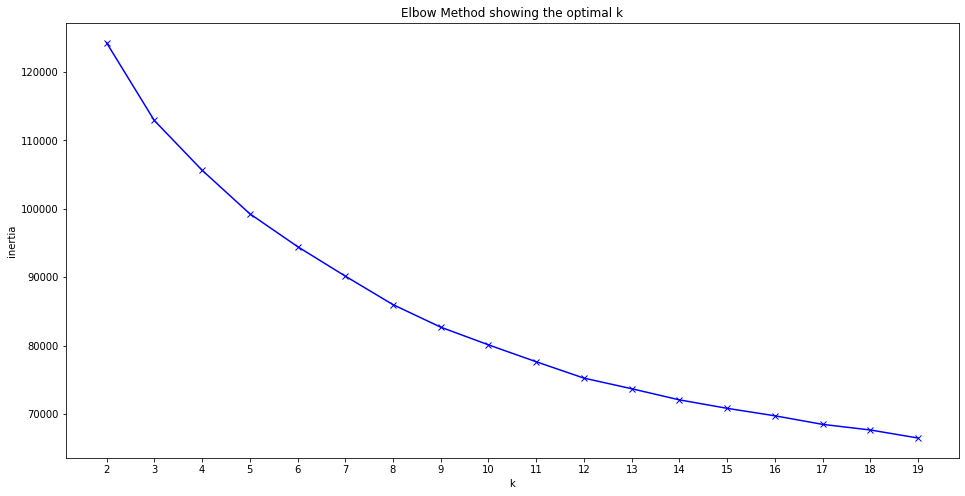

In [47]:
# INERTIA SCORE AND ELBOW PLOT
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [48]:
# This elbow plot definitely does not highlight any clear amount of clusters for my dataset

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

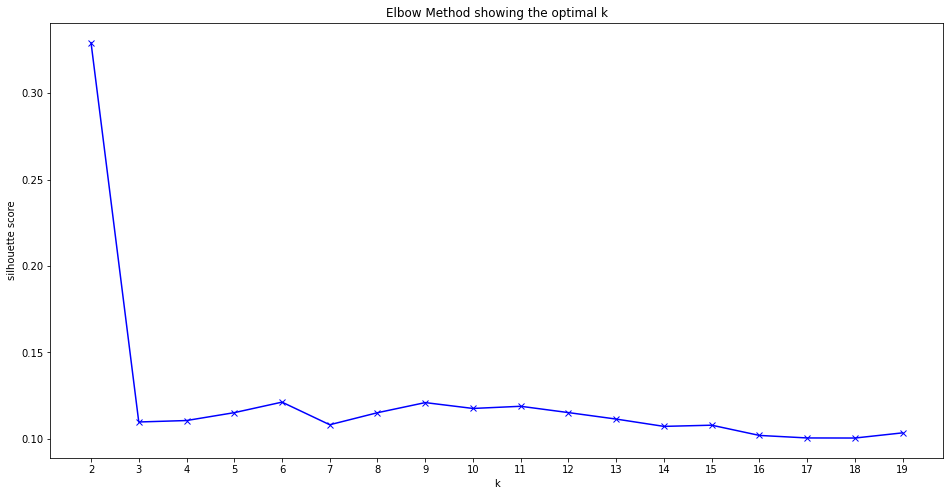

In [49]:
# SILOUETTE SCORE

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [50]:
# Silouette is instead a different story. As sort of guessed, inside the playlist there are two more or less different genre: rock and metal. Therefore, maybe, silouette indicates to use 2 clusters. 

In [51]:
# Finally we run K-Means
#kmeans = KMeans(n_clusters=12, random_state=1234)
#kmeans.fit(X_prep)

In [52]:
# Predicting / assigning the clusters:
# change type of algorithm, instead of random i want to use initializations
# hyper parameter optimizations
kmeans = KMeans(n_clusters=12,
                init="random", # initial points at random
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...# how many times restarts the algorithm
                max_iter=1000, # how many times, in each of initializations, reconvert center and assigning points
                tol=0,
                random_state=1234)
# Kmeans have all the info here
kmeans.fit(X_prep)
print(kmeans.inertia_)

75242.43547431879


In [53]:
# Predicting / assigning the clusters:

# CANNOT PLOT many columns at the same time, but can run KMeans, it is just a measurement of distance!
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     1272
1     1041
2      778
3     1302
4     2010
5      560
6      689
7      265
8     1097
9     1423
10     581
11     129
dtype: int64

In [54]:
pd.Series(clusters)

0         9
1         1
2         5
3         1
4         1
         ..
11142    10
11143     0
11144     5
11145     0
11146     4
Length: 11147, dtype: int32

In [55]:
# create new column with clusters
rock_punk_metal_df['clusters'] = clusters

In [56]:
rock_punk_metal_df

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,Come As You Are,Nirvana,0.500,0.824,4,-5.846,0,0.0388,0.000160,0.001610,0.0916,0.5390,120.125,audio_features,0MKGH8UMfCnq5w7nG06oM5,spotify:track:0MKGH8UMfCnq5w7nG06oM5,https://api.spotify.com/v1/tracks/0MKGH8UMfCnq...,https://api.spotify.com/v1/audio-analysis/0MKG...,218920,4,9
1,Fortunate Son,Creedence Clearwater Revival,0.643,0.669,0,-7.485,1,0.0398,0.208000,0.006640,0.1510,0.6090,132.709,audio_features,3yI282DoIJyERd0vGukMoB,spotify:track:3yI282DoIJyERd0vGukMoB,https://api.spotify.com/v1/tracks/3yI282DoIJyE...,https://api.spotify.com/v1/audio-analysis/3yI2...,140773,4,1
2,Patience,Guns N' Roses,0.458,0.265,6,-14.452,1,0.0313,0.723000,0.000254,0.1920,0.3520,120.411,audio_features,2uKcU4FPX5eOjmd6RWb9OF,spotify:track:2uKcU4FPX5eOjmd6RWb9OF,https://api.spotify.com/v1/tracks/2uKcU4FPX5eO...,https://api.spotify.com/v1/audio-analysis/2uKc...,354400,4,5
3,Lithium,Nirvana,0.678,0.656,7,-6.410,1,0.0381,0.001740,0.000000,0.0631,0.4850,123.207,audio_features,26D1PRJjD9Jj1JGRk88KVc,spotify:track:26D1PRJjD9Jj1JGRk88KVc,https://api.spotify.com/v1/tracks/26D1PRJjD9Jj...,https://api.spotify.com/v1/audio-analysis/26D1...,257053,4,1
4,Every Breath You Take - Remastered 2003,The Police,0.813,0.460,1,-9.780,1,0.0346,0.560000,0.010500,0.0724,0.7290,117.387,audio_features,2sXp9Qmvc7mRaDBjBgcGGi,spotify:track:2sXp9Qmvc7mRaDBjBgcGGi,https://api.spotify.com/v1/tracks/2sXp9Qmvc7mR...,https://api.spotify.com/v1/audio-analysis/2sXp...,253887,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11142,Poor Millionaire,August Burns Red,0.243,0.995,2,-3.570,1,0.2570,0.000041,0.004310,0.0601,0.0685,145.590,audio_features,51s4b7suWjx4iR7jlYoiki,spotify:track:51s4b7suWjx4iR7jlYoiki,https://api.spotify.com/v1/tracks/51s4b7suWjx4...,https://api.spotify.com/v1/audio-analysis/51s4...,290493,4,10
11143,Falling Down,Van Canto,0.515,0.914,11,-6.987,0,0.0479,0.001750,0.000700,0.2900,0.3420,131.960,audio_features,4h7n4LvqPtRijWLM3IK3Rx,spotify:track:4h7n4LvqPtRijWLM3IK3Rx,https://api.spotify.com/v1/tracks/4h7n4LvqPtRi...,https://api.spotify.com/v1/audio-analysis/4h7n...,311268,4,0
11144,To the Power of Eight,Van Canto,0.422,0.330,4,-12.879,0,0.0309,0.603000,0.894000,0.1680,0.2340,145.094,audio_features,0cJS9RZFpQHoZ1FwPNR1KV,spotify:track:0cJS9RZFpQHoZ1FwPNR1KV,https://api.spotify.com/v1/tracks/0cJS9RZFpQHo...,https://api.spotify.com/v1/audio-analysis/0cJS...,118740,4,5
11145,The Cursed Muse,Seven Spires,0.383,0.946,11,-5.658,0,0.0682,0.000008,0.002420,0.0750,0.2700,110.029,audio_features,7g8eJkuqQeImgB3fQIcbtP,spotify:track:7g8eJkuqQeImgB3fQIcbtP,https://api.spotify.com/v1/tracks/7g8eJkuqQeIm...,https://api.spotify.com/v1/audio-analysis/7g8e...,259812,4,0


In [57]:
# concat clusters with main dataset

rock_metal_clusterd = pd.concat([pd.Series(clusters),rock_punk_metal_df],axis=1)

In [58]:
pd.DataFrame(rock_punk_metal_df).shape

(11147, 21)

In [60]:
# - 1) create a function that user input name song and spotipy finds it and extract features of input song
# - 2) create a function that compare features extracted above, scale them and compare with features of my dataset
# - 3) create a function that gives back a song that is in the cluster most similar to the feature of inputed song


In [61]:
# functions steps

# - 1) code for searching any song in spotify
results = sp.search(q='Naive', limit=50)

# - 2) code for getting the audio_feature of a song
song_uri = results['tracks']['items'][0]['uri']

# - 3) getting the uri
audio_features = sp.audio_features(song_uri)

# - 4) code for transforming new audio features of song into dataframe
audio_features_df = pd.DataFrame(audio_features)

# - 5) transform into numbers 
x_audio_features_df = audio_features_df.select_dtypes(include=np.number)

# - 6) scale new song
x_scaler_audio_features = scaler.transform(x_audio_features_df)

# - 7) KMeans fit and give new cluster for input song
cluster_input_song = kmeans.predict(x_scaler_audio_features)
print(rock_punk_metal_df[rock_punk_metal_df['clusters'] == cluster_input_song[0]].sample()[['title','artist']])

              title     artist
1763  Every Morning  Sugar Ray


In [65]:
# creating the function actually

def hell_tracker(x):
  results = sp.search(q=x, limit=50)
  song_uri = results['tracks']['items'][0]['uri']
  audio_features = sp.audio_features(song_uri)
  audio_features_df = pd.DataFrame(audio_features)
  x_audio_features_df = audio_features_df.select_dtypes(include=np.number)
  x_scaler_audio_features = scaler.transform(x_audio_features_df)
  cluster_input_song = kmeans.predict(x_scaler_audio_features)
  return print(rock_punk_metal_df[rock_punk_metal_df['clusters'] == cluster_input_song[0]].sample()[['title','artist']])

In [66]:
# calling the HELL tracker

userinput = input('').title()
hell_tracker(userinput)

Falling Down van Canto
                  title            artist
3715  Sleepless Goddess  Stellar Circuits


In [67]:
# checking if clusters solution works and it does!!
solution= rock_punk_metal_df[rock_punk_metal_df['title']== 'Sleepless Goddess']
solution

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
3715,Sleepless Goddess,Stellar Circuits,0.424,0.87,11,-5.729,0,0.0563,0.00789,0.000003,0.376,0.331,119.888,audio_features,0Y6kg7VusUeIdzVs3fQJrO,spotify:track:0Y6kg7VusUeIdzVs3fQJrO,https://api.spotify.com/v1/tracks/0Y6kg7VusUeI...,https://api.spotify.com/v1/audio-analysis/0Y6k...,322758,4,0


#**Billboard Hot Songs Scraping**

In [68]:
# import important packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random 

In [69]:
# uploading the codes as URL on colab
# 2. find url and store it in a variable
url = "https://www.billboard.com/charts/hot-100"

In [70]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

In [71]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")

In [72]:
# checking the newly freshly made soup
soup

Output hidden; open in https://colab.research.google.com to view.

In [73]:
# retrieve/extract the desired info on top songs
soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary")

[<span class="chart-element__information__song text--truncate color--primary">Rapstar</span>,
 <span class="chart-element__information__song text--truncate color--primary">Leave The Door Open</span>,
 <span class="chart-element__information__song text--truncate color--primary">Peaches</span>,
 <span class="chart-element__information__song text--truncate color--primary">Montero (Call Me By Your Name)</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Astronaut In The Ocean</span>,
 <span class="chart-element__information__song text--truncate color--primary">Kiss Me More</span>,
 <span class="chart-element__information__song text--truncate color--primary">Up</span>,
 <span class="chart-element__information__song text--truncate color--primary">Drivers License

In [74]:
# select only the title of songs (put here the code you used above!!)
soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary")[0].get_text()

'Rapstar'

In [75]:
# create nice list with top songs
top_songs_billboard = []

num_iter = len(soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary"))

In [76]:
# for loop to create nice lists: iterate through the result set and retrive all the data
for i in range(num_iter):
    top_songs_billboard.append(soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary")[i].get_text())

print(top_songs_billboard)

['Rapstar', 'Leave The Door Open', 'Peaches', 'Montero (Call Me By Your Name)', 'Levitating', 'Save Your Tears', 'Astronaut In The Ocean', 'Kiss Me More', 'Up', 'Drivers License', 'Deja Vu', 'Solid', 'Blinding Lights', 'Beat Box', 'Best Friend', 'Calling My Phone', 'What You Know Bout Love', 'Ski', 'Mood', 'Heartbreak Anniversary', 'The Good Ones', 'Beautiful Mistakes', 'Back In Blood', 'Go Crazy', 'You Broke Me First.', '34+35', "My Ex's Best Friend", "What's Next", 'Dakiti', 'Therefore I Am', 'Without You', 'On Me', 'Positions', "You're Mines Still", 'Forever After All', 'Wants And Needs', 'Track Star', "We're Good", 'Heat Waves', 'For The Night', 'Hell Of A View', 'Made For You', 'No More Parties', 'Good Days', 'Starting Over', 'Diamonds Dancing', 'Goosebumps', 'Tombstone', "Breaking Up Was Easy In The 90's", 'Somebody Like That', 'Streets', "What's Your Country Song", 'Time Today', 'Telepatia', 'Cry Baby', 'Hold On', 'Street Runner', 'Just The Way', 'Proud Of You', 'Willow', 'Damag

In [77]:
# with the artists, retrieve/extract the desired info on top artists
soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary")

[<span class="chart-element__information__artist text--truncate color--secondary">Polo G</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Silk Sonic (Bruno Mars &amp; Anderson .Paak)</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Justin Bieber Featuring Daniel Caesar &amp; Giveon</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Lil Nas X</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Dua Lipa Featuring DaBaby</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">The Weeknd</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Masked Wolf</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Doja Cat Featuring SZA</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Cardi B</span

In [78]:
# select only the title of artists (put here the code you used above!!)
soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary")[0].get_text()

'Polo G'

In [79]:
# create nice list with top artists
top_artists_billboard = []

num_iter1 = len(soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary"))

In [80]:
# for loop to create nice lists: iterate through the result set and retrive all the artists
for i in range(num_iter1):
    top_artists_billboard.append(soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary")[i].get_text())

print(top_artists_billboard)

['Polo G', 'Silk Sonic (Bruno Mars & Anderson .Paak)', 'Justin Bieber Featuring Daniel Caesar & Giveon', 'Lil Nas X', 'Dua Lipa Featuring DaBaby', 'The Weeknd', 'Masked Wolf', 'Doja Cat Featuring SZA', 'Cardi B', 'Olivia Rodrigo', 'Olivia Rodrigo', 'Young Thug & Gunna Featuring Drake', 'The Weeknd', 'SpotemGottem Featuring Pooh Shiesty Or DaBaby', 'Saweetie Featuring Doja Cat', 'Lil Tjay Featuring 6LACK', 'Pop Smoke', 'Young Thug & Gunna', '24kGoldn Featuring iann dior', 'Giveon', 'Gabby Barrett', 'Maroon 5 Featuring Megan Thee Stallion', 'Pooh Shiesty Featuring Lil Durk', 'Chris Brown & Young Thug', 'Tate McRae', 'Ariana Grande', 'Machine Gun Kelly X blackbear', 'Drake', 'Bad Bunny & Jhay Cortez', 'Billie Eilish', 'The Kid LAROI', 'Lil Baby', 'Ariana Grande', 'Yung Bleu Featuring Drake', 'Luke Combs', 'Drake Featuring Lil Baby', 'Mooski', 'Dua Lipa', 'Glass Animals', 'Pop Smoke Featuring Lil Baby & DaBaby', 'Eric Church', 'Jake Owen', 'Coi Leray Featuring Lil Durk', 'SZA', 'Chris Stap

In [81]:
# each list becomes a column
top_of_the_pops = pd.DataFrame({'top_songs':top_songs_billboard, 'top_artists':top_artists_billboard})
top_of_the_pops.head()

,top_songs,top_artists
0,Rapstar,Polo G
1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
2,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
3,Montero (Call Me By Your Name),Lil Nas X
4,Levitating,Dua Lipa Featuring DaBaby


In [82]:
# define the first prototype to recommend songs based on input(Miguel input)

#def prototype1_version1():
#  name = input("Tell me a song and I will suggest you one super cool back: ")
#  if name in top_of_the_pops["top_songs"].values:
#    recommendation = top_of_the_pops.sample()
#    print("\n I know it, super nice song! Then, you should listen to this: \n" + recommendation["top_songs"].value[0] + "\n\nfrom:\n" + recommendation["top_artists"].values[0])

#  else:
#    print("You caught me, I don't this song! Please try with another one")

In [83]:
def top100():
    x=random.choice(top_of_the_pops['top_songs'])
    user_choice= input('Choose a song from the Billboard TOP100:')
    
    if user_choice not in list(top_of_the_pops['top_songs']):
        print('Sorry, this song is not included in the TOP100! Try with another song')
    else:
        print('If you like', user_choice, 'You also will like', x)

In [84]:
top100()

Choose a song from the Billboard TOP100:Rapstar
If you like Rapstar You also will like Blinding Lights


# **The Final Rock Punk Metal Tracker**

In [92]:
# defining the function with Billboard dataset and spotify tracker: HELL_TRACKER
def spotify(x):
    if userinput not in list(top_of_the_pops['top_songs']): 
        results = sp.search(q=x, limit=50)
        song_uri = results['tracks']['items'][0]['uri']
        audio_features = sp.audio_features(song_uri)
        audio_features_df = pd.DataFrame(audio_features)
        x_audio_features_df = audio_features_df.select_dtypes(include=np.number)
        x_scaler_audio_features = scaler.transform(x_audio_features_df)
        cluster_input_song = kmeans.predict(x_scaler_audio_features)
        print(rock_punk_metal_df[rock_punk_metal_df['clusters'] == cluster_input_song[0]].sample()[['title','artist']])
    else:
        x=random.choice(top_of_the_pops['top_songs'])
        print("your song",userinput,'is superhot right now')
        print('if you like',userinput,'you may also like', x)

In [93]:
# Let's call the function:
userinput = input('').title()
spotify(userinput)

Naive
    title                        artist
488  Lodi  Creedence Clearwater Revival
